## Argo status

Let's use, reproduce the figure of the status of the Argo network that is found on the AST web page:

In [1]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

from datetime import date, timedelta

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

The correspondence for the DATA_CENTRE code and the name is in the _Reference table 4: data centres and institutions codes of the [Argo user’s manual](https://archimer.ifremer.fr/doc/00187/29825/)_

and it is possible to get the WMO of all the platforms that measured during this month, together with its data acquisition center. Hence, we can download the netCDF files for each cycle if necessary:

In [2]:
day=7
month=7
year=2021

In [3]:
status_date = date(year,month,day)

In [4]:
WMOs=np.array([])
DACs=np.array([])
LONs=np.array([])
LATs=np.array([])
TEMPs=np.array([])
PROJECT_NAMEs=np.array([])

In [5]:
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for i in  range(0,30):
        day = status_date - timedelta(days=i)
        filein=f"../../Data/202107-ArgoData/geo/{basin}/{day.year:04d}/{day.month:02d}/{day.year:04d}{day.month:02d}{day.day:02d}_prof.nc"
        DS=xr.open_dataset(filein)

        DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
        PROJECT_NAMEs=np.append(PROJECT_NAMEs,DS.PROJECT_NAME.astype(str).values)
        WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)
        LONs=np.append(LONs,DS.LONGITUDE.values)
        LATs=np.append(LATs,DS.LATITUDE.values)
        

        tempi= np.zeros(DS.LONGITUDE.values.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,DS.LONGITUDE.values.shape[0]):
            tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
        TEMPs=np.append(TEMPs,tempi)

In [6]:
#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]
LONs=LONs[indices]
LATs=LATs[indices]
PROJECT_NAMEs=PROJECT_NAMEs[indices]
TEMPs=TEMPs[indices]

In [7]:
DACs=np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(DACs, 
                     'IF','coriolis'),'BO','bodc'),'AO','aoml'),
                     'HZ','csio'),'CS','csiro'),'IN','incois'),'JA','jma'),'KM','kma'),
                     'KO','kordi'),'ME','meds'),'NM','nmdis')


In [8]:
print(f"{WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],500):
    print(f"{ip} WMO {WMOs[ip]} DAC {DACs[ip]}")

3772 Argo floats where active:
0 WMO 1901302.0 DAC bodc
500 WMO 2903342.0 DAC jma
1000 WMO 3901975.0 DAC coriolis
1500 WMO 4903194.0 DAC aoml
2000 WMO 5904733.0 DAC aoml
2500 WMO 5905664.0 DAC aoml
3000 WMO 5906409.0 DAC aoml
3500 WMO 6903573.0 DAC coriolis


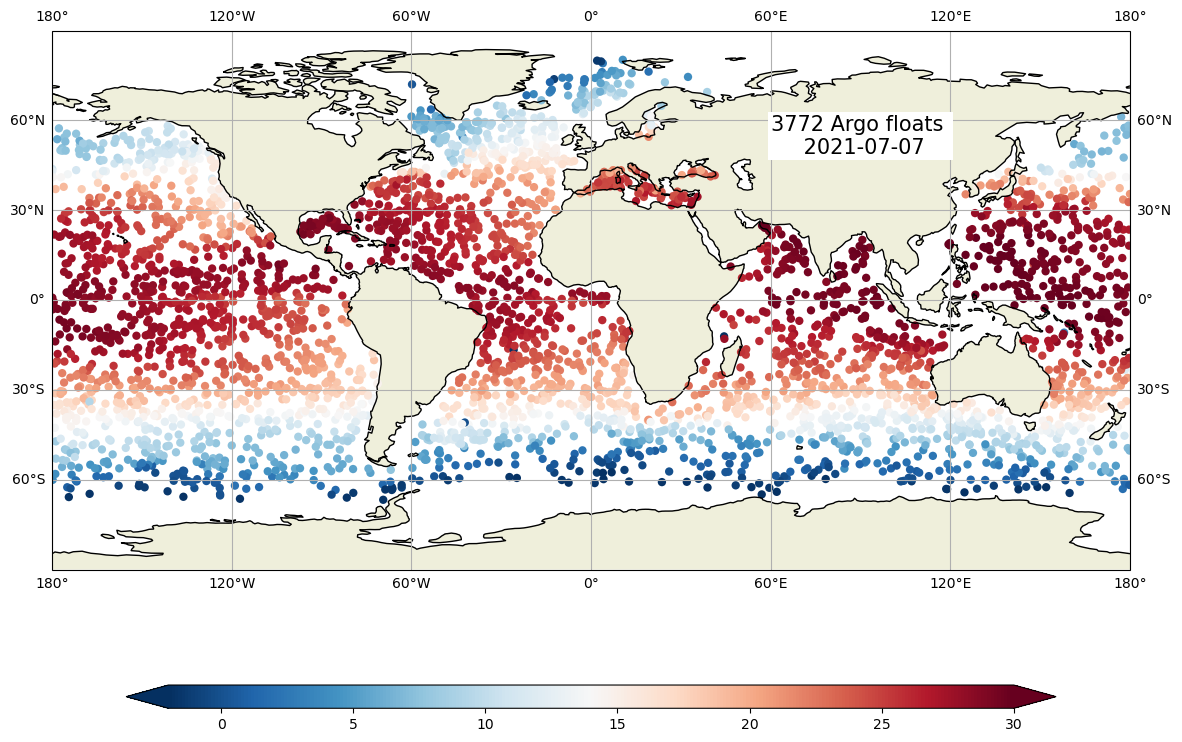

In [9]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_global()
cs=ax.scatter(LONs,LATs,c=TEMPs,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')
ax.text(90,62,f"{WMOs.shape[0]} Argo floats \n {status_date:%Y-%m-%d}",fontsize=15, horizontalalignment='center',
        verticalalignment='top',bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)